In [42]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train_data = pd.read_csv('train.csv')
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [44]:
test_data = pd.read_csv('test.csv')


## Exploratory Data Analysis

In [45]:
print(train_data.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [46]:
# converting the age (in days) into years
from datetime import date, timedelta

# Define the age in days
age_in_days = train_data['Age']
# Average number of days in a year (considering leap years)
average_days_in_year = 365.25

# Calculate age in years as a float
train_data['Age(inYears)'] = train_data['Age'] / average_days_in_year
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age(inYears)
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,58.951403
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,...,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,52.668036
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,37.582478
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,...,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,50.540726
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,...,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,45.607118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,...,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C,46.102669
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,...,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C,46.628337
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,...,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D,70.836413
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,...,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D,62.861054


In [47]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.000000,1976.000000,3952.000000,5928.000000,7904.000000
N_Days,7905.0,2030.173308,1094.233744,41.000000,1230.000000,1831.000000,2689.000000,4795.000000
Age,7905.0,18373.146490,3679.958739,9598.000000,15574.000000,18713.000000,20684.000000,28650.000000
Bilirubin,7905.0,2.594485,3.812960,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,7905.0,350.561923,195.379344,120.000000,248.000000,298.000000,390.000000,1775.000000
Albumin,7905.0,3.548323,0.346171,1.960000,3.350000,3.580000,3.770000,4.640000
Copper,7905.0,83.902846,75.899266,4.000000,39.000000,63.000000,102.000000,588.000000
Alk_Phos,7905.0,1816.745250,1903.750657,289.000000,834.000000,1181.000000,1857.000000,13862.400000
SGOT,7905.0,114.604602,48.790945,26.350000,75.950000,108.500000,137.950000,457.250000
Tryglicerides,7905.0,115.340164,52.530402,33.000000,84.000000,104.000000,139.000000,598.000000


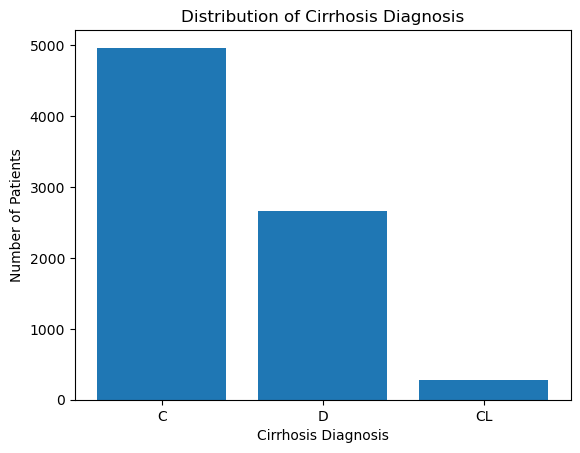

In [48]:
# Count patients with and without cirrhosis
cirrhosis_counts = train_data['Status'].value_counts()

# Plot the distribution
plt.bar(cirrhosis_counts.index, cirrhosis_counts.values)
plt.xlabel('Cirrhosis Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cirrhosis Diagnosis')
plt.show()

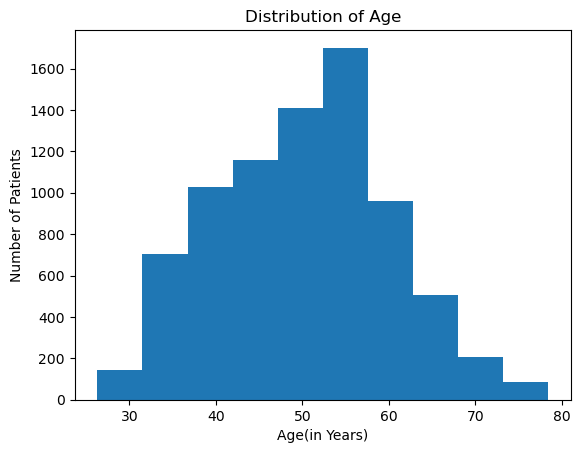

In [49]:
# Example for Age distribution
plt.hist(train_data['Age(inYears)'])
plt.xlabel('Age(in Years)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Age')
plt.show()

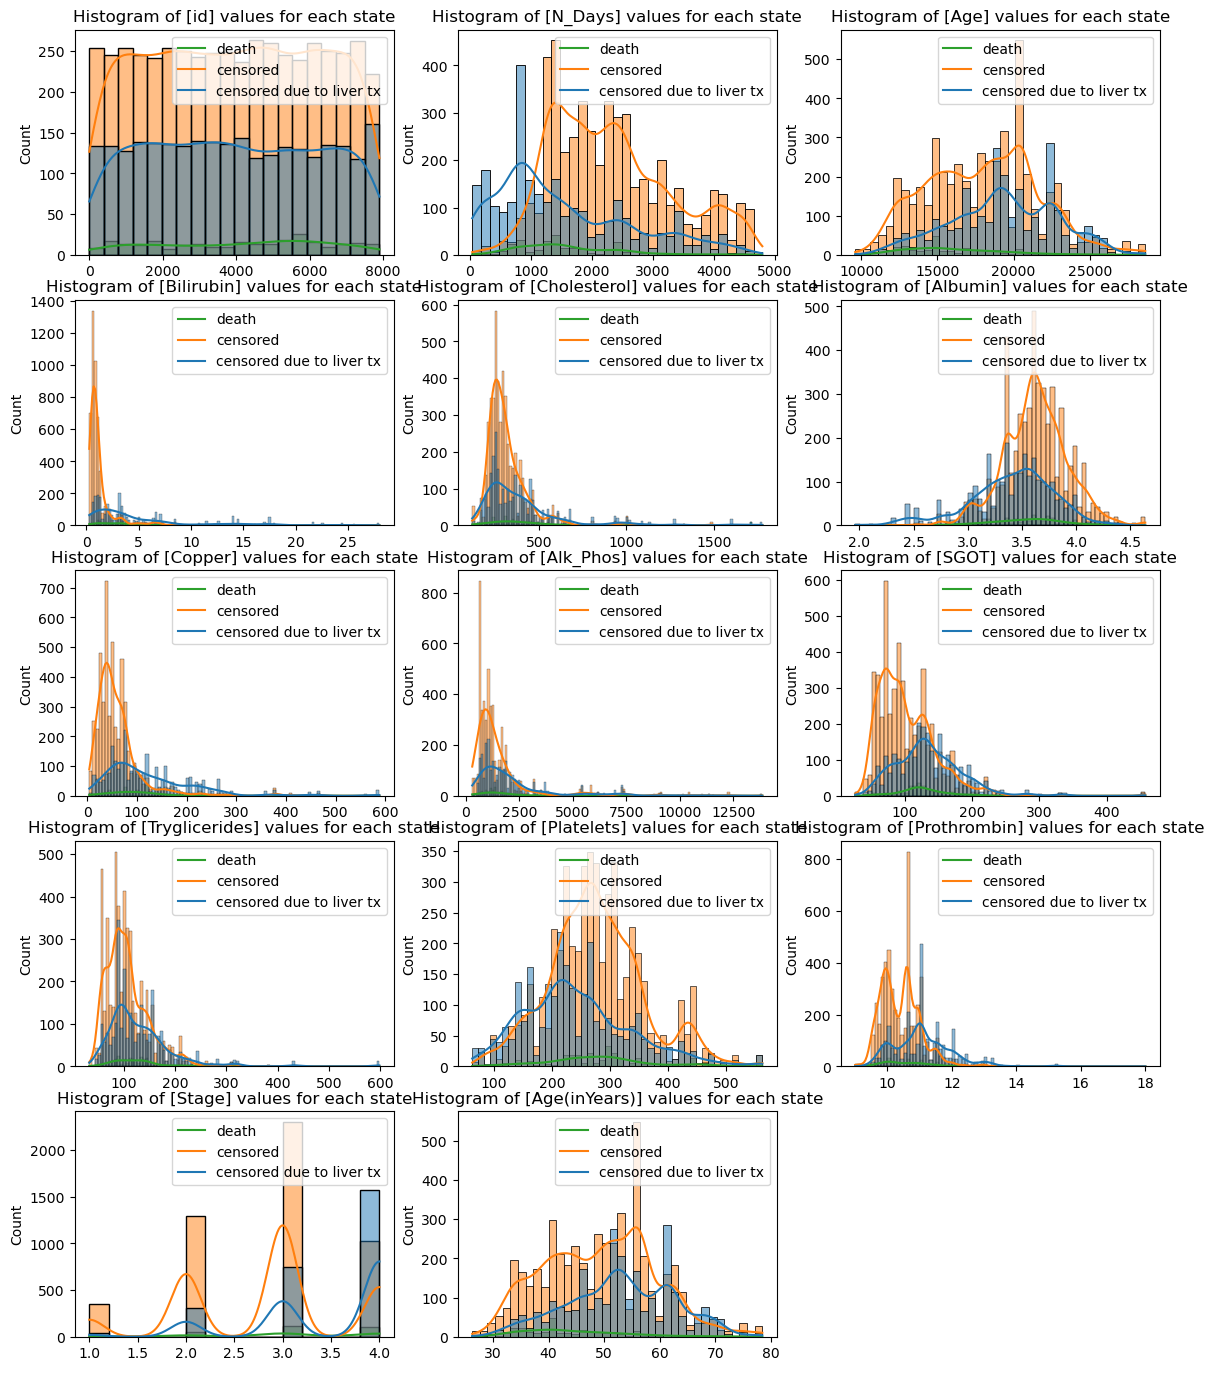

In [50]:
k = 1
plt.figure(figsize=(14,24));

for i in train_data.columns:
    if train_data[i].dtype != 'object':
        
        plt.subplot(7,3,k);
        sb.histplot(data = train_data, x = train_data[i],kde = True, hue = train_data['Status']);
        plt.title('Histogram of ['+ i +'] values for each state', size = 12);
        plt.xlabel(" ")
        plt.legend(['death', 'censored', 'censored due to liver tx'], loc = 0);

        k+=1

In [51]:
numeric = train_data.select_dtypes(include=["number"])
numeric.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age(inYears)
0,0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,58.951403
1,1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,52.668036
2,2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,37.582478
3,3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,50.540726
4,4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,45.607118


In [52]:
# Sex distribution
sex_counts = train_data['Sex'].value_counts()
print(sex_counts)


F    7336
M     569
Name: Sex, dtype: int64


ValueError: num must be an integer with 1 <= num <= 24, not 25

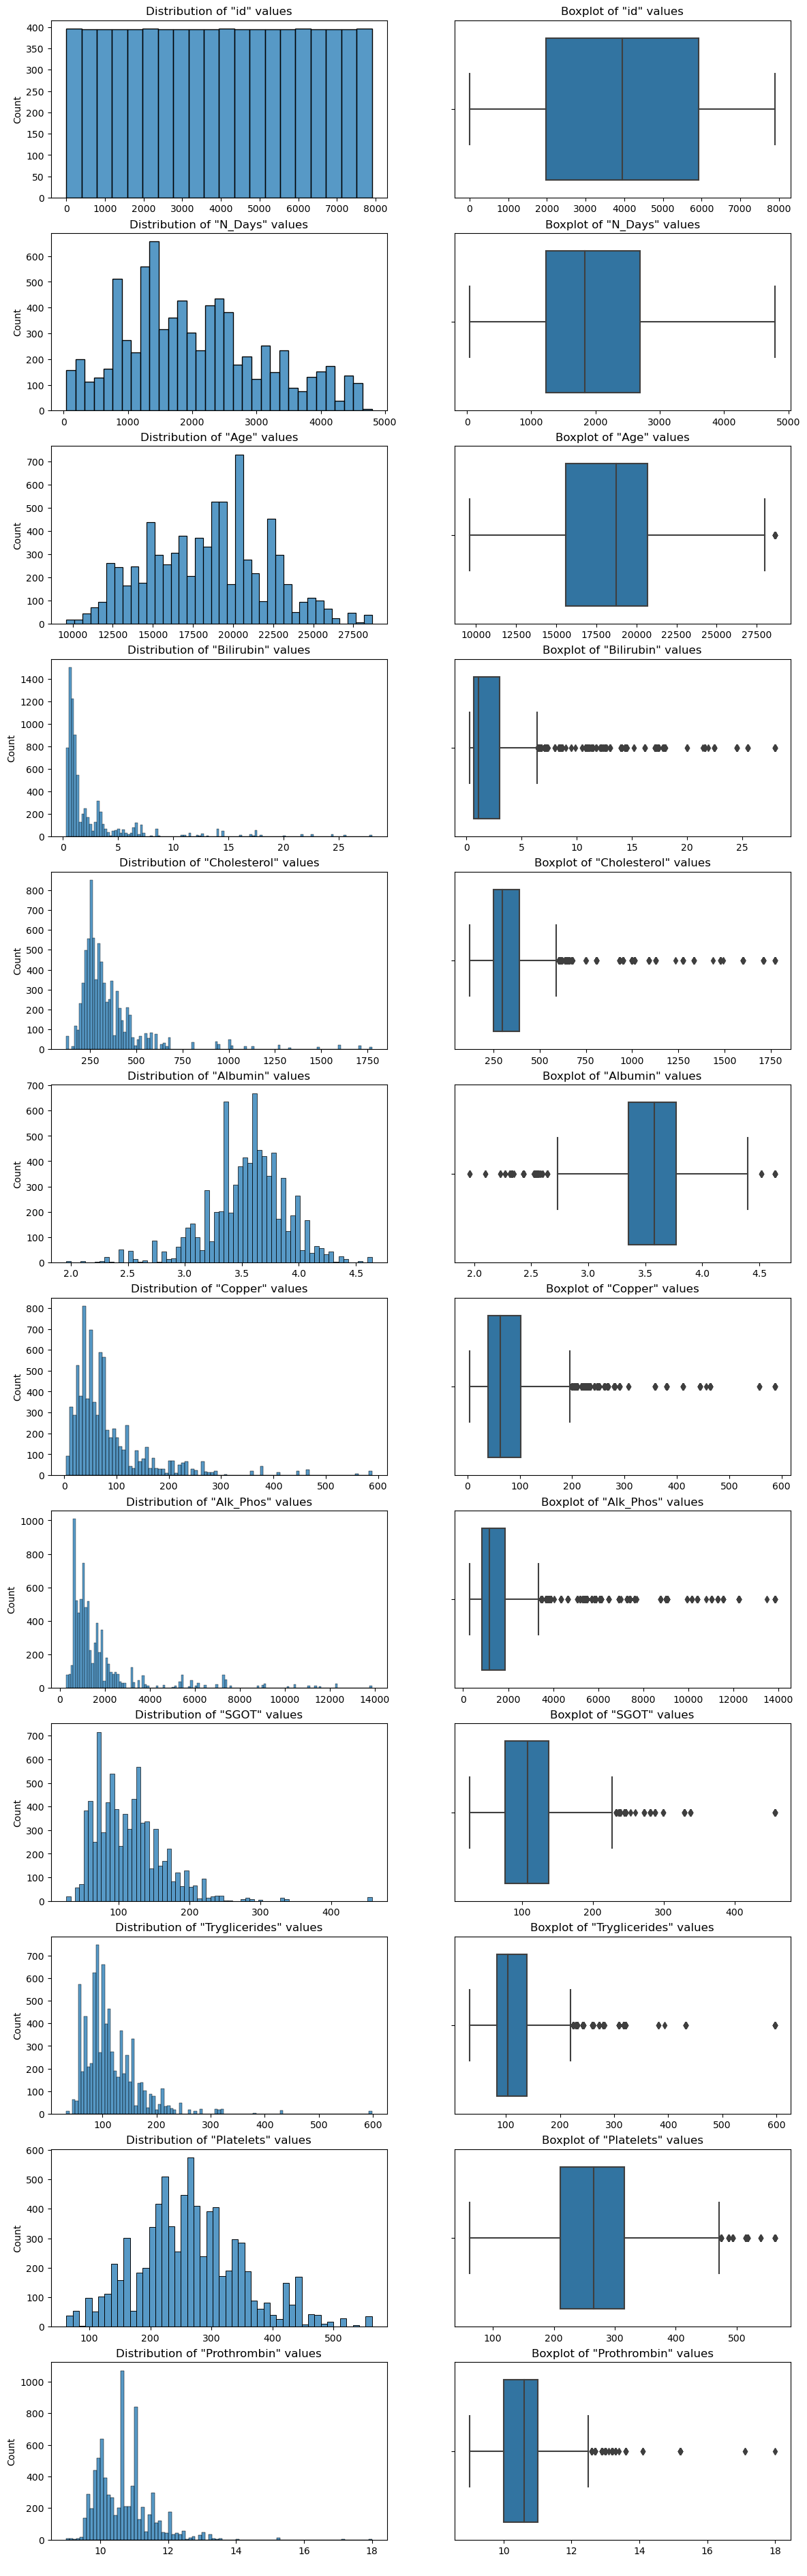

In [53]:
#Outlier Detection
j = 1
z = 2

plt.figure(figsize=(14,48));

for i in numeric.columns:
    plt.subplot(12,2,j);
    sb.histplot(x = numeric[i]);
    plt.title('Distribution of "'+i+'" values') 
    plt.xlabel(" ");
    j+=2
    
    plt.subplot(12,2,z);
    sb.boxplot(x = numeric[i]);
    plt.title('Boxplot of "'+i+'" values')
    plt.xlabel(" ");
    z+=2

In [55]:
cat_cols=[]
unique_values = {}
for column in train_data.select_dtypes(include=['object']):
    cat_cols.append(column)
    unique_values[column] = train_data[column].unique()
    
unique_values

{'Drug': array(['D-penicillamine', 'Placebo'], dtype=object),
 'Sex': array(['M', 'F'], dtype=object),
 'Ascites': array(['N', 'Y'], dtype=object),
 'Hepatomegaly': array(['N', 'Y'], dtype=object),
 'Spiders': array(['N', 'Y'], dtype=object),
 'Edema': array(['N', 'Y', 'S'], dtype=object),
 'Status': array(['D', 'C', 'CL'], dtype=object)}

In [57]:
plt.figure(figsize=(12,18));

j = 1
for i in cat_df.columns:   
    plt.subplot(4,2,j);
    ax = sb.countplot(data = cat_df, y = cat_df[i], hue = 'status');
    plt.title('Countplot of "'+ i +'" variable');
    plt.xlabel(" ");
    plt.legend(['death', 'censored', 'censored due to liver tx'], loc = 4);
    
    
    for container in ax.containers:
        ax.bar_label(container)
        
    j+=1

AttributeError: 'list' object has no attribute 'columns'

<Figure size 1200x1800 with 0 Axes>

In [ ]:
cat_cols

In [58]:
# Drug Sex Ascites Hepatomegaly  Spiders 
# Edema
def process_train(df):
    df["Drug"] = df["Drug"].map({"Placebo": 0, "D-penicillamine": 1})
    df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
    df['Ascites'] = df['Ascites'].map({"N":0, "Y":1})
    df['Hepatomegaly'] = df['Hepatomegaly'].map({"N":0, "Y":1})
    df['Spiders'] = df['Spiders'].map({"N":0, "Y":1})
    df['Edema'] = df['Edema'].map({"N":0, "Y":1, "S":2})
    
    df['Status'] = df['Status'].map({"C":0, "CL":1, "D":2})
    return df

train= process_train(train_data)
train

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age(inYears)
0,0,999,1,21532,0,0,0,0,0,2.3,...,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2,58.951403
1,1,2574,0,19237,1,0,0,0,0,0.9,...,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0,52.668036
2,2,3428,0,13727,1,0,1,1,1,3.3,...,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2,37.582478
3,3,2576,0,18460,1,0,0,0,0,0.6,...,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0,50.540726
4,4,788,0,16658,1,0,1,0,0,1.1,...,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0,45.607118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,1,16839,1,0,0,0,0,0.8,...,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,0,46.102669
7901,7901,1492,0,17031,1,0,1,0,0,0.9,...,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0,46.628337
7902,7902,1576,1,25873,1,0,0,1,2,2.0,...,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,2,70.836413
7903,7903,3584,1,22960,0,0,1,0,0,0.7,...,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,2,62.861054


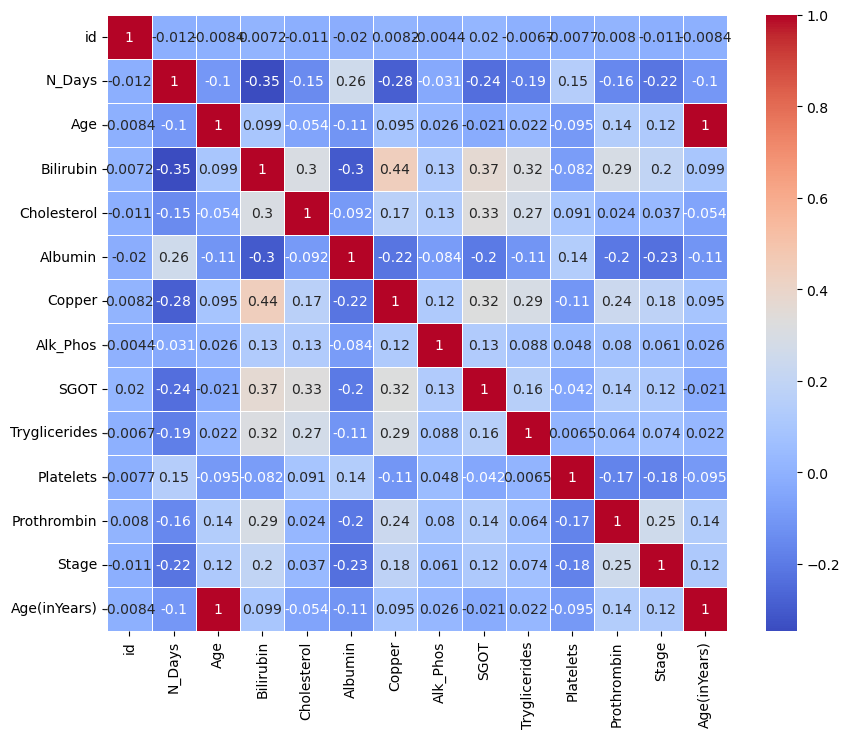

In [59]:
def plot_heatmap(df, exclude_columns=[]):
    
    df_filtered = df.drop(columns=exclude_columns)
   
    correlation_matrix = df_filtered.corr()
   
    plt.figure(figsize=(10, 8))
   
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
   
    plt.show()



plot_heatmap(train, exclude_columns=cat_cols)

In [61]:
test_data = pd.read_csv('test.csv')
test_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


# SVM Model

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [64]:

X = train_data.drop('Status', axis=1)  # Features
y = train_data['Status']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
svm_model = SVC(kernel='rbf', C=1.0)  # Adjust parameters as needed
svm_model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7185
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       966
           1       0.00      0.00      0.00        52
           2       0.76      0.43      0.55       563

    accuracy                           0.72      1581
   macro avg       0.49      0.45      0.45      1581
weighted avg       0.70      0.72      0.69      1581



C:\Users\Gloria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gloria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gloria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
